In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./data.csv')
print(df)

    Accuracy(%)  Avg. Reaction Time(s)
0          92.3                   1.98
1         100.0                   2.32
2          98.0                   1.85
3          96.3                   1.35
4         100.0                   1.80
5          81.0                   2.26
6          87.9                   1.56
7          89.0                   1.90
8          85.0                   2.11
9          88.7                   2.43
10         89.4                   1.43
11         94.7                   1.24
12         92.3                   1.58
13         85.3                   2.13
14         88.6                   2.33
15         93.4                   1.34
16         98.2                   1.23
17         97.7                   1.45
18         86.4                   2.65
19         90.0                   1.45
20         98.2                   1.30


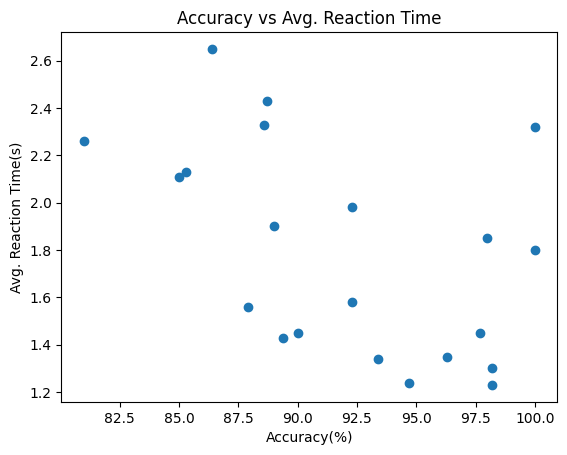

In [5]:
plt.scatter(df['Accuracy(%)'], df['Avg. Reaction Time(s)'])
plt.xlabel('Accuracy(%)')
plt.ylabel('Avg. Reaction Time(s)')
plt.title('Accuracy vs Avg. Reaction Time')
plt.show()

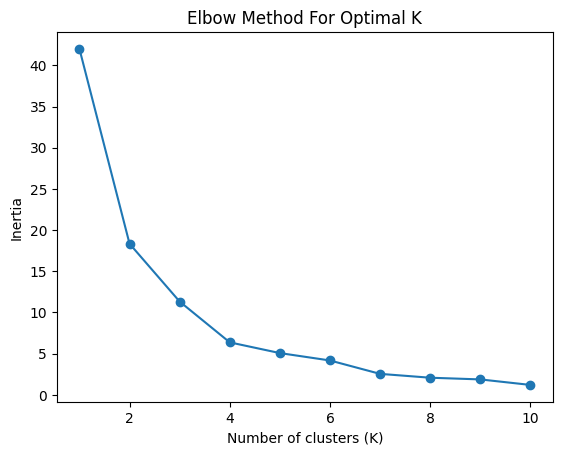

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

Optimal K is 4

In [7]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
labels_4 = kmeans_4.fit_predict(X_scaled)

df['Cluster'] = labels_4
print(df)

    Accuracy(%)  Avg. Reaction Time(s)  Cluster
0          92.3                   1.98        0
1         100.0                   2.32        2
2          98.0                   1.85        2
3          96.3                   1.35        1
4         100.0                   1.80        2
5          81.0                   2.26        3
6          87.9                   1.56        0
7          89.0                   1.90        0
8          85.0                   2.11        3
9          88.7                   2.43        3
10         89.4                   1.43        0
11         94.7                   1.24        1
12         92.3                   1.58        0
13         85.3                   2.13        3
14         88.6                   2.33        3
15         93.4                   1.34        1
16         98.2                   1.23        1
17         97.7                   1.45        1
18         86.4                   2.65        3
19         90.0                   1.45  

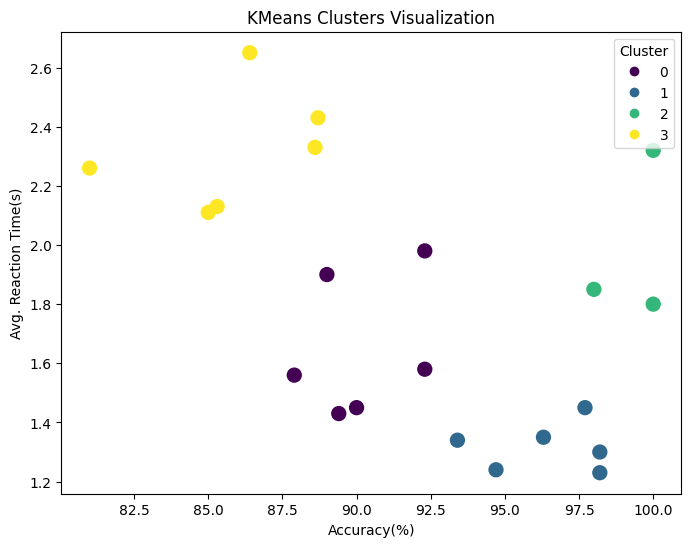

In [8]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Accuracy(%)'], df['Avg. Reaction Time(s)'], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Accuracy(%)')
plt.ylabel('Avg. Reaction Time(s)')
plt.title('KMeans Clusters Visualization')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

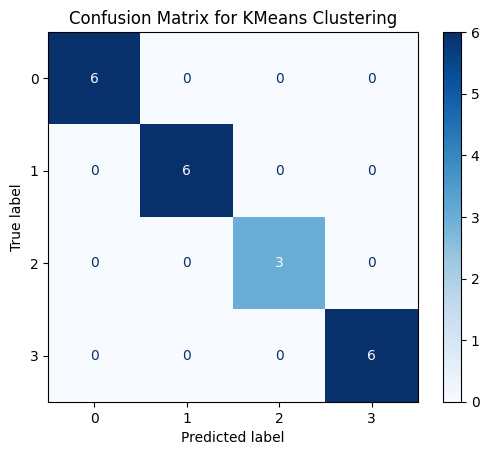

In [9]:

cm_kmeans = confusion_matrix(df['Cluster'], labels_4)
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans, display_labels=np.unique(df['Cluster']))
disp_kmeans.plot(cmap='Blues')
plt.title('Confusion Matrix for KMeans Clustering')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X = df[['Accuracy(%)', 'Avg. Reaction Time(s)']]
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

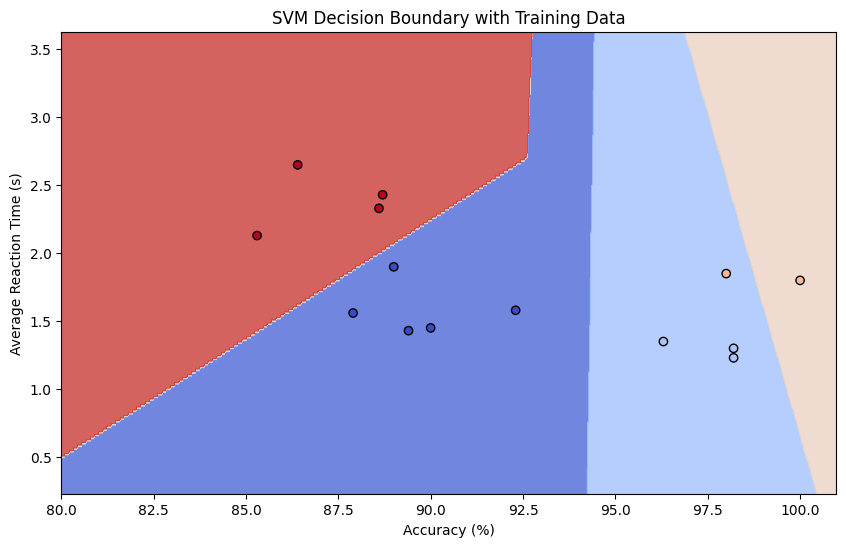

In [11]:
clf = svm.SVC(kernel='linear', C=1.0)


clf.fit(X_train, y_train)

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))


predict_grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X_train.columns)



Z = clf.predict(predict_grid) 
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Accuracy (%)')
plt.ylabel('Average Reaction Time (s)')
plt.title('SVM Decision Boundary with Training Data')
plt.show()

--- Performance Metrics on Test Set ---
Accuracy: 0.8571

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2

    accuracy                           0.86         7
   macro avg       0.88      0.92      0.87         7
weighted avg       0.93      0.86      0.87         7



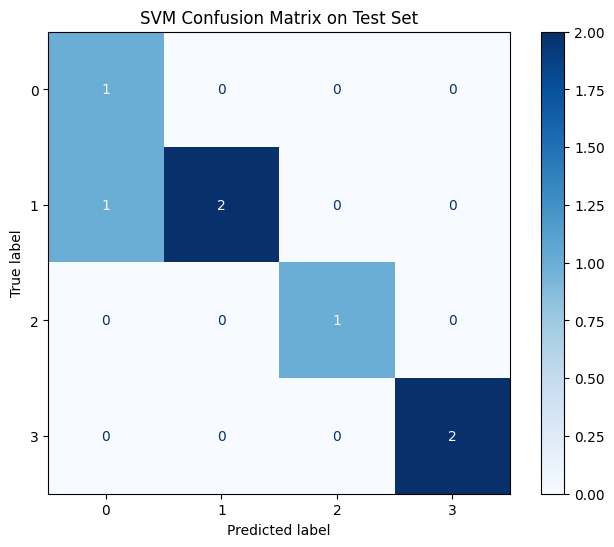

In [28]:



y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("--- Performance Metrics on Test Set ---")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('SVM Confusion Matrix on Test Set')
plt.show()

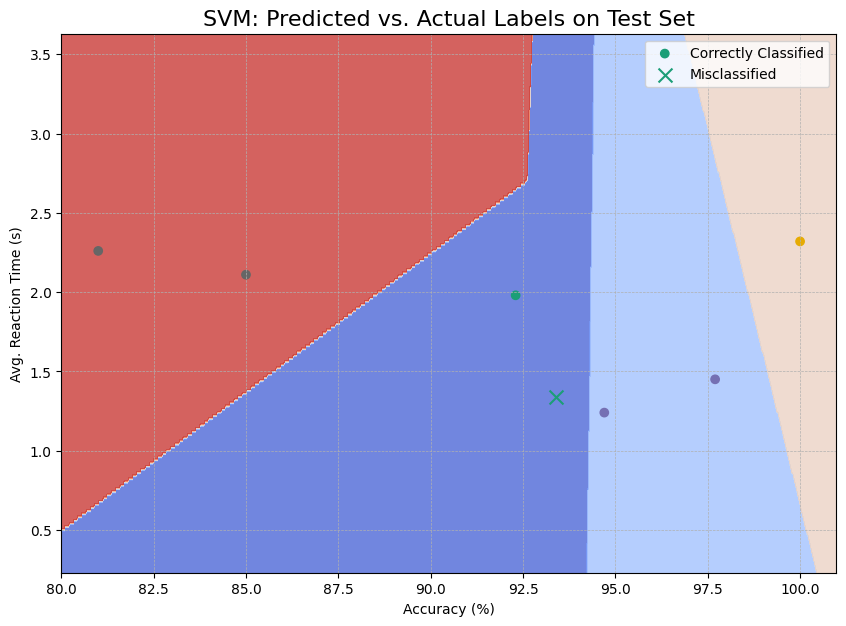

In [ ]:
plt.figure(figsize=(10, 7))
y_pred_svm = clf.predict(X_test)

correct_svm = (y_test == y_pred_svm)
incorrect_svm = ~correct_svm

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_test[correct_svm].iloc[:, 0], X_test[correct_svm].iloc[:, 1],
            c=y_test[correct_svm], cmap='Dark2', marker='o', label='Correctly Classified')


plt.scatter(X_test[incorrect_svm].iloc[:, 0], X_test[incorrect_svm].iloc[:, 1],
            c=y_test[incorrect_svm], cmap='Dark2', marker='x', s=100, label='Misclassified')

plt.title('SVM: Predicted vs. Actual Labels on Test Set', fontsize=16)
plt.xlabel('Accuracy (%)')

plt.ylabel('Avg. Reaction Time (s)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

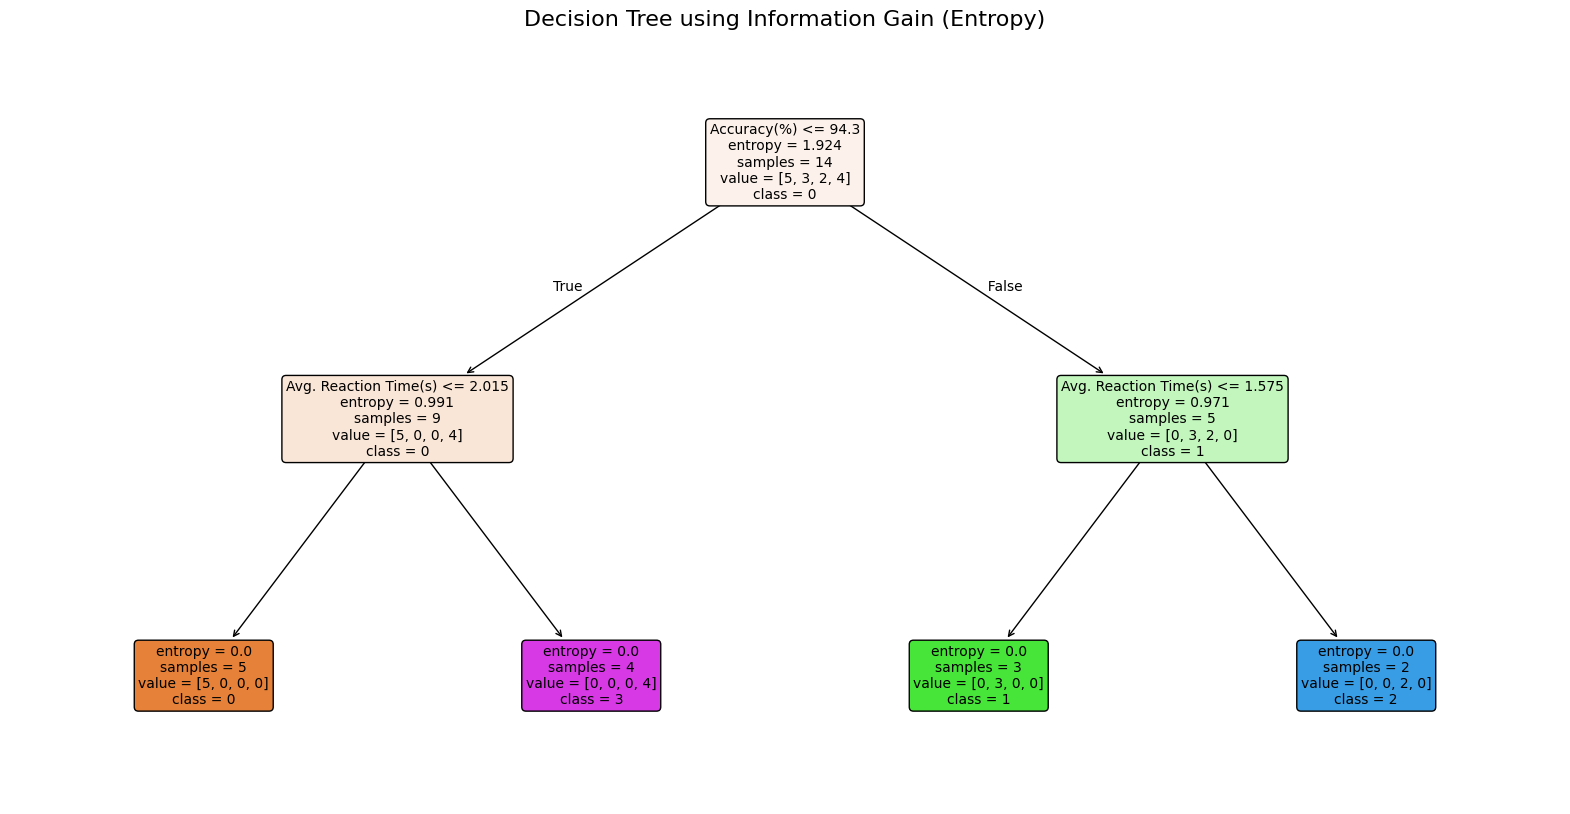

In [ ]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train, y_train)

plt.figure(figsize=(20, 10))

plot_tree(dt_classifier,
          filled=True,
          feature_names=X_train.columns.tolist(),
 
          class_names=dt_classifier.classes_.astype(str),
          rounded=True,
          fontsize=10)

plt.title("Decision Tree using Information Gain (Entropy)", fontsize=16)
plt.show()

--- Decision Tree Performance on Test Set ---
Accuracy: 0.8571

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2

    accuracy                           0.86         7
   macro avg       0.88      0.92      0.87         7
weighted avg       0.93      0.86      0.87         7



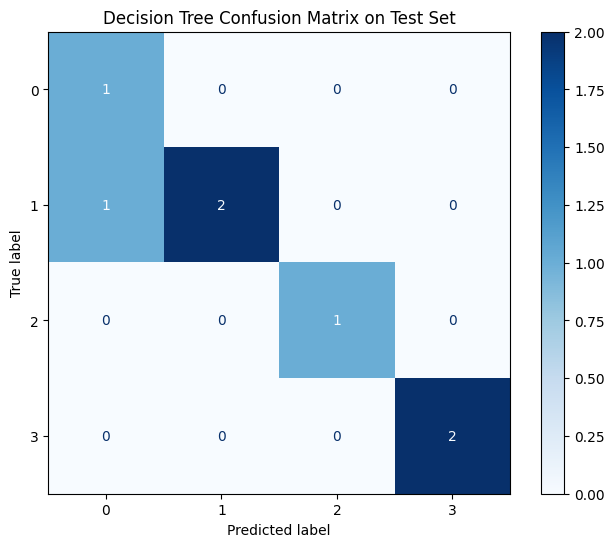

In [ ]:
y_pred_dt = dt_classifier.predict(X_test)


accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("--- Decision Tree Performance on Test Set ---")
print(f"Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dt_classifier.classes_)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt,
                                 display_labels=dt_classifier.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp_dt.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Decision Tree Confusion Matrix on Test Set')
plt.show()

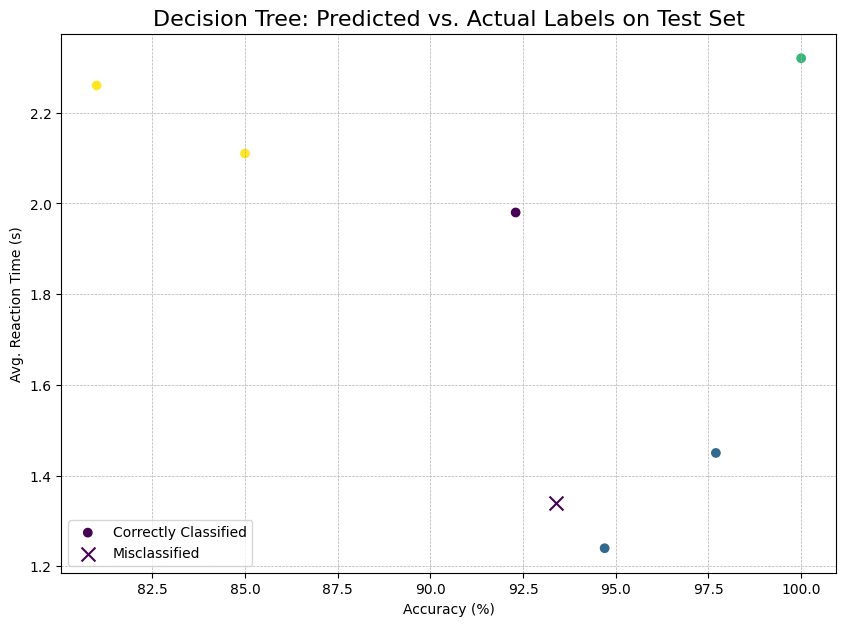

In [ ]:

plt.figure(figsize=(10, 7))


correct_dt = (y_test == y_pred_dt)
incorrect_dt = ~correct_dt


plt.scatter(X_test[correct_dt].iloc[:, 0], X_test[correct_dt].iloc[:, 1],
            c=y_test[correct_dt], cmap='viridis', marker='o', label='Correctly Classified')

plt.scatter(X_test[incorrect_dt].iloc[:, 0], X_test[incorrect_dt].iloc[:, 1],
            c=y_test[incorrect_dt], cmap='viridis', marker='x', s=100, label='Misclassified')

plt.title('Decision Tree: Predicted vs. Actual Labels on Test Set', fontsize=16)
plt.xlabel('Accuracy (%)')
plt.ylabel('Avg. Reaction Time (s)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()